# Condensation
Condensation is the process of a gas changing to a liquid. The process is driven by the difference in the partial pressure of the gas and the saturation pressure of the liquid. The saturation pressure is the pressure at which the gas and liquid are in equilibrium. The process is reversible and the rate of condensation is proportional to the difference in the partial pressure of the gas and the saturation pressure of the liquid. 

Condensation can result from a temperature change, like is the case of dew formation, or from a change in pressure, like is the case of the formation of clouds.
In addition there are chemical processes that result in new molecules being formed in the gas phase, that have a lower vapor pressure than the original molecules. This is the case of the formation of sulfate aerosol formed from SO2(gas).

We will just be assuming a condensation rate and seeing how it affects the aerosol size distribution.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from particula.particle import Particle
from particula.rates import Rates
from particula.dynamics import Solver
from particula import u


# plot sizes
plt.rcParams["figure.figsize"] = (12,9)
plt.rcParams["font.size"] = (16)

In [2]:
specifics = {
    "mode": 100e-9,
    "gsigma": 1.4,
    "nbins": 250, # fewer bins is faster, but less accurate
    "nparticles": 1e5, # 1e4 #
    "volume": 1e-6, # /cc
    "spacing": 'logspace',
    "vapor_concentration": 1e-5, # /cc
    "particle_formation_rate": 0,
}

part_dist= Particle( **specifics)
rates_low = Rates(particle=part_dist, lazy=True)

rates_low.condensation_growth_speed()[1]

array(2.4269182e-06) <Unit('meter / second')>

c:\Users\kkgor\anaconda3\envs\AtmClass\lib\site-packages\numpy\core\_asarray.py:83: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return array(a, dtype, copy=False, order=order)
c:\Users\kkgor\anaconda3\envs\AtmClass\lib\site-packages\numpy\core\_asarray.py:83: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return array(a, dtype, copy=False, order=order)


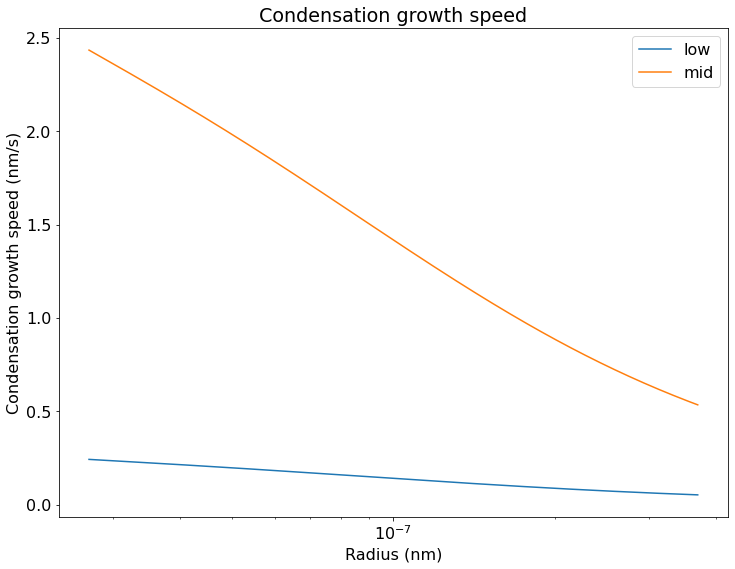

In [31]:
specifics = {
    "mode": 100e-9,
    "gsigma": 1.4,
    "nbins": 250, # fewer bins is faster, but less accurate
    "nparticles": 1e2, # 1e4 #
    "volume": 1e-6, # /cc
    "spacing": 'logspace',
    "vapor_concentration": 1e-9, # /cc
    "particle_formation_rate": 0,
}

part_dist= Particle( **specifics)
rates_low = Rates(particle=part_dist, lazy=True)


specifics_mid = {
    "mode": 100e-9,
    "gsigma": 1.4,
    "nbins": 250, # fewer bins is faster, but less accurate
    "nparticles": 1e2, # 1e4 #
    "volume": 1e-6, # /cc
    "spacing": 'logspace',
    "vapor_concentration": 1e-8, # /cc
    "particle_formation_rate": 0,
}

part_dist_mid= Particle( **specifics_mid)
rates_mid = Rates(particle=part_dist_mid, lazy=True)


fig, ax = plt.subplots()
ax.semilogx(part_dist.particle_radius.m, rates_low.condensation_growth_speed().to(u.nm/u.sec), label="low")
ax.semilogx(part_dist_mid.particle_radius.m, rates_mid.condensation_growth_speed().to(u.nm/u.sec), label="mid")
ax.set_xlabel("Radius (nm)")
ax.set_ylabel("Condensation growth speed (nm/s)")
ax.set_title("Condensation growth speed")
ax.legend()

In [44]:
print(part_dist.vapor_flux()[0])
print(part_dist_mid.vapor_flux()[0])

[3.904647346580224e-22] kilogram / second
[3.904647346580223e-15] kilogram / second


c:\Users\kkgor\anaconda3\envs\AtmClass\lib\site-packages\numpy\core\_asarray.py:83: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return array(a, dtype, copy=False, order=order)
c:\Users\kkgor\anaconda3\envs\AtmClass\lib\site-packages\numpy\core\_asarray.py:83: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return array(a, dtype, copy=False, order=order)
c:\Users\kkgor\anaconda3\envs\AtmClass\lib\site-packages\numpy\core\_asarray.py:83: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Particls [#/cc]')

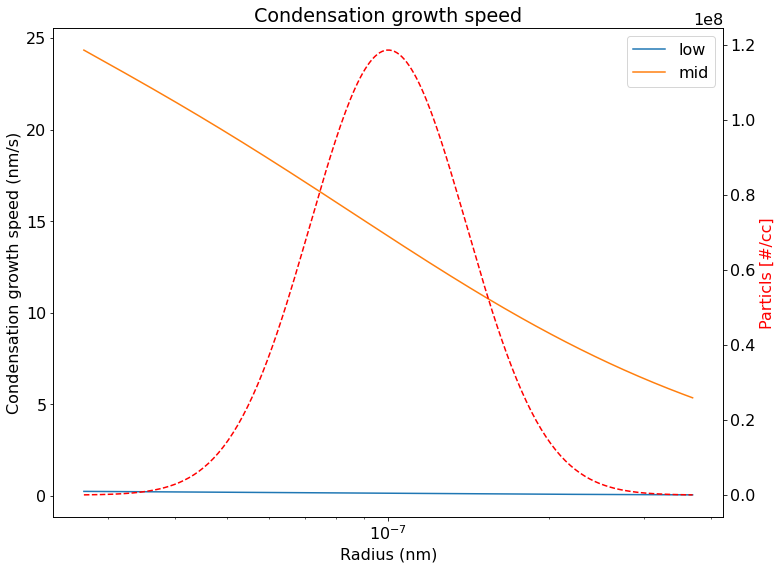

In [4]:
fig, ax = plt.subplots()
ax.semilogx(part_dist.particle_radius.m, rates_low.condensation_growth_speed().to(u.nm/u.sec), label="low")
ax.semilogx(part_dist_mid.particle_radius.m, rates_mid.condensation_growth_speed().to(u.nm/u.sec), label="mid")
ax.set_xlabel("Radius (nm)")
ax.set_ylabel("Condensation growth speed (nm/s)")
ax.set_title("Condensation growth speed")
ax.legend()
at = ax.twinx()
at.semilogx(part_dist.particle_radius.m, part_dist.particle_distribution()*part_dist.particle_radius, label="low",color = 'red', linestyle='dashed')
at.set_ylabel("Particls [#/cc]", color='red')

# apply condensation in time

c:\Users\kkgor\anaconda3\envs\AtmClass\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
c:\Users\kkgor\anaconda3\envs\AtmClass\lib\site-packages\numpy\core\_asarray.py:83: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return array(a, dtype, copy=False, order=order)
c:\Users\kkgor\anaconda3\envs\AtmClass\lib\site-packages\numpy\core\_asarray.py:83: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return array(a, dtype, copy=False, order=order)


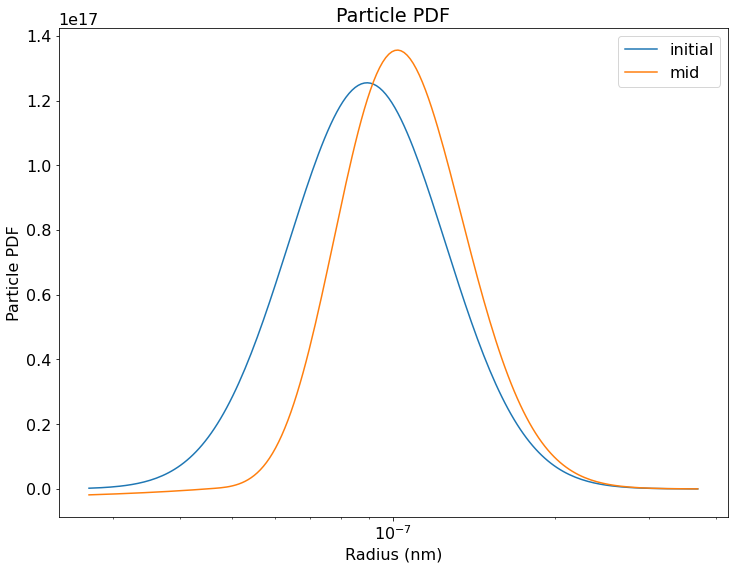

In [33]:
time_span = [0, 60*4] # seconds


specifics_low = {
    "mode": 100e-9,
    "gsigma": 1.4,
    "nbins": 200, # fewer bins is faster, but less accurate
    "nparticles": 1e4, # 1e4 #
    "volume": 1e-6, # /cc
    "spacing": 'logspace',
    "vapor_concentration": 1e-9, # /cc
    "particle_formation_rate": 0,
    "vapor_attachment": 1,
}

part_dist_low= Particle( **specifics_low)
rates_low = Rates(particle=part_dist_low, lazy=True)
s_low = Solver( particle=part_dist_low, time_span=time_span)
sols_low = s_low.solution()


fig, ax = plt.subplots()
ax.semilogx(part_dist_low.particle_radius.m, sols_low[0], label="initial")
ax.semilogx(part_dist_low.particle_radius.m, sols_low[-1], label="mid")
ax.set_xlabel("Radius (nm)")
ax.set_ylabel("Particle PDF")
ax.set_title("Particle PDF")
ax.legend()

# 2 min runtime

More condensation

c:\Users\kkgor\anaconda3\envs\AtmClass\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
c:\Users\kkgor\anaconda3\envs\AtmClass\lib\site-packages\numpy\core\_asarray.py:83: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return array(a, dtype, copy=False, order=order)
c:\Users\kkgor\anaconda3\envs\AtmClass\lib\site-packages\numpy\core\_asarray.py:83: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return array(a, dtype, copy=False, order=order)


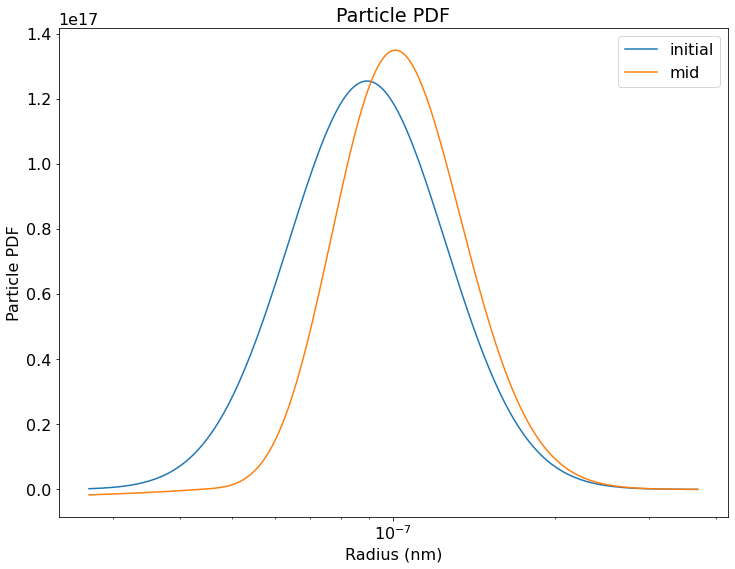

In [45]:
time_span = [0, 60*4] # seconds


specifics_mid = {
    "mode": 100e-9,
    "gsigma": 1.4,
    "nbins": 200, # fewer bins is faster, but less accurate
    "nparticles": 1e4, # 1e4 #
    "volume": 1e-6, # /cc
    "spacing": 'logspace',
    "vapor_concentration": 1e5, # /cc
    "particle_formation_rate": 0,
    "vapor_attachment": 1,
}

part_dist_mid= Particle( **specifics_mid)
rates_mid = Rates(particle=part_dist_mid, lazy=True)
s_mid = Solver( particle=part_dist_mid, time_span=time_span)
sols_mid = s_mid.solution()


fig, ax = plt.subplots()
ax.semilogx(part_dist_mid.particle_radius.m, sols_mid[0], label="initial")
ax.semilogx(part_dist_mid.particle_radius.m, sols_mid[-1], label="mid")
ax.set_xlabel("Radius (nm)")
ax.set_ylabel("Particle PDF")
ax.set_title("Particle PDF")
ax.legend()

# 1 min runtime


Compare condensation for the two cases

c:\Users\kkgor\anaconda3\envs\AtmClass\lib\site-packages\numpy\core\_asarray.py:83: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return array(a, dtype, copy=False, order=order)
c:\Users\kkgor\anaconda3\envs\AtmClass\lib\site-packages\numpy\core\_asarray.py:83: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return array(a, dtype, copy=False, order=order)


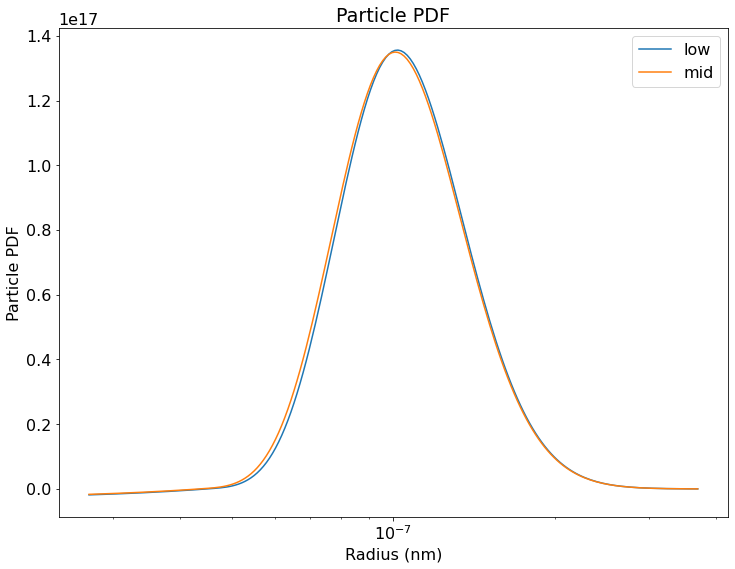

In [46]:
fig, ax = plt.subplots()
ax.semilogx(part_dist_low.particle_radius.m, sols_low[-1], label="low")
ax.semilogx(part_dist_mid.particle_radius.m, sols_mid[-1], label="mid")
ax.set_xlabel("Radius (nm)")
ax.set_ylabel("Particle PDF")
ax.set_title("Particle PDF")
ax.legend()

lower vapor attachment rate

In [ ]:


time_span = [0, 60*4] # seconds


specifics_mid = {
    "mode": 100e-9,
    "gsigma": 1.4,
    "nbins": 200, # fewer bins is faster, but less accurate
    "nparticles": 1e4, # 1e4 #
    "volume": 1e-6, # /cc
    "spacing": 'logspace',
    "vapor_concentration": 1e1, # /cc
    "particle_formation_rate": 0,
    "vapor_attachment": 0.1,
}

part_dist_mid= Particle( **specifics_mid)
rates_mid = Rates(particle=part_dist_mid, lazy=True)
s_mid = Solver( particle=part_dist_mid, time_span=time_span)
sols_mid = s_mid.solution()


fig, ax = plt.subplots()
ax.semilogx(part_dist_mid.particle_radius.m, sols_mid[0], label="initial")
ax.semilogx(part_dist_mid.particle_radius.m, sols_mid[-1], label="mid")
ax.set_xlabel("Radius (nm)")
ax.set_ylabel("Particle PDF")
ax.set_title("Particle PDF")
ax.legend()
